In [123]:
#to add package, go to REPL
#using Pkg
#Pkg.add("Package Name")
using DataFrames
using RDatasets
using Statistics
using StatsPlots
using CSV
using StatsBase
using NamedArrays
using PrettyTables

using LIBSVM
using Printf
using SVR
using MLJ
using Mads
using Metrics

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.TFPN :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.binary_accuracy :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.categorical_accuracy :: Tuple{Any, Any}` in mo

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.recall :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.f_beta_score :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.specificity :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `Metrics.false_alarm_rate :: Tuple{Any, 

In [2]:
df = CSV.read(joinpath(dirname(@__FILE__),"Concrete_Data.csv"), DataFrame)

,Cement (kg/m3),Blast Furnace Slag (kg/m3),Fly Ash (kg/m3),Water (kg/m3),Superplasticizer (kg/m3)
,Float64,Float64,Float64,Float64,Float64
1,540.0,0.0,0.0,162.0,2.5
2,540.0,0.0,0.0,162.0,2.5
3,332.5,142.5,0.0,228.0,0.0
4,332.5,142.5,0.0,228.0,0.0
5,198.6,132.4,0.0,192.0,0.0
6,266.0,114.0,0.0,228.0,0.0
7,380.0,95.0,0.0,228.0,0.0
8,380.0,95.0,0.0,228.0,0.0
9,266.0,114.0,0.0,228.0,0.0


In [252]:
#splitting into 70% training, 15% test, 15% validation

x = Matrix(df[:, 1:8])
y = Matrix(df[:, 9:9])

xtrain = x[1:700, :]
ytrain = y[1:700]

xtest = x[701:850, :]
ytest = y[701:850]

xval = x[851:1030, :]
yval = y[851:1030]

180-element Vector{Float64}:
 37.36
 32.84
 42.64
 40.06
 41.94
 61.23
 40.87
 33.3
 52.42
 15.09
  ⋮
 31.88
 41.54
 39.46
 37.92
 44.28
 31.18
 23.7
 32.77
 32.4

In [253]:
#training the model, setting the hypermeters C, degree, gamma. Want to use gridsearch to optimise hyperparameters. Not sure what SVR.train does

pmodel = SVR.train(ytrain, permutedims(xtrain),; kernel_type=SVR.RBF, C= 10.0, degree = 1 , gamma = 0.00003)

y_pr = SVR.predict(pmodel, permutedims(xtest))
mse_SVR = mse(y_pr, ytest)

78.19094935363009

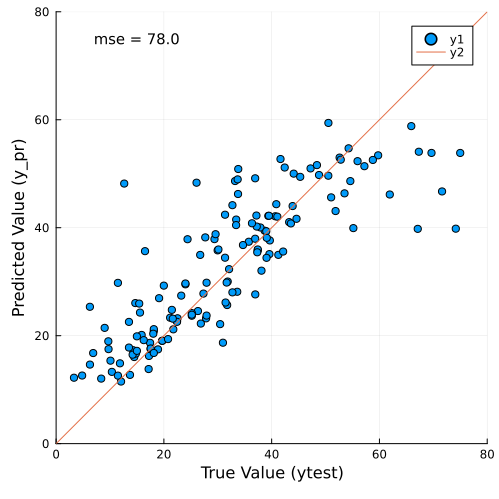

In [254]:
#plotting graph to see predicted vs true
compare_plt = plot(ytest, y_pr, 
st=:scatter,
xlims=(0,80),
ylims=(0,80),
xlab = "True Value (ytest)",
ylab = "Predicted Value (y_pr)",
size = (500,500))

xx = 0:80
yy = 0:80

plot!(compare_plt, xx, yy, st=:line)

mse_SVR = mse(y_pr, ytest)
annotate!(15,75, text("mse = $(round(mse_SVR, sigdigits=2))", 10))

display(compare_plt)